In [ ]:
%pip install matplotlib pandas scikit-learn

1) We will plot height on the X axis and the SNPs as different colored dots on the same plot to get a rough idea of the relation between the data.

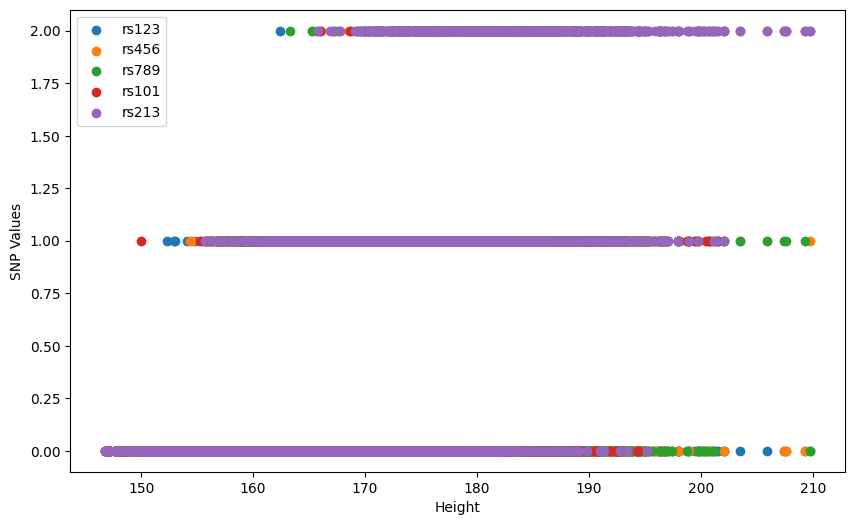

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('./5snps.txt', header="infer", sep="\t")
snps = df.columns.tolist()
snps.remove("height")
snps.remove("id")

plt.figure(figsize=(10, 6))

for i in snps:
    plt.scatter(df['height'], df[i], label=i)

plt.xlabel('Height')
plt.ylabel("SNP Values")
plt.legend()
plt.show()

2) This is unreadable so we will use different plots for each.

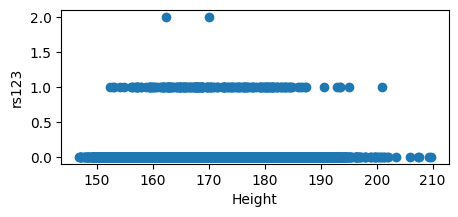

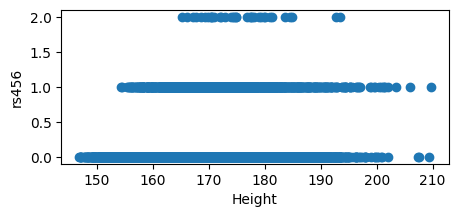

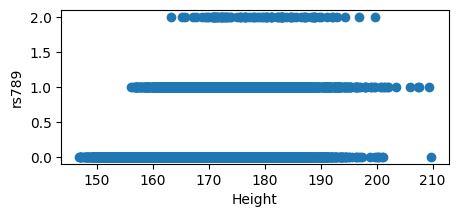

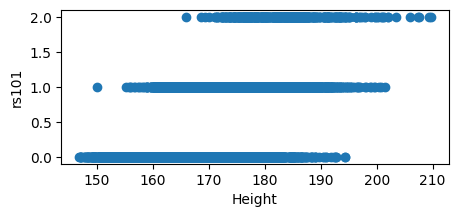

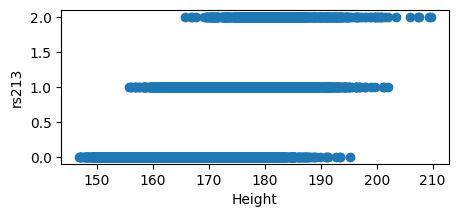

In [36]:

for i in snps:
    plt.figure(figsize=(5, 2))
    plt.scatter(df['height'], df[i], label=i)
    plt.xlabel('Height')
    plt.ylabel(i)
    plt.show()

3) We can see some correlation like rs213 and rs 101 have values 2 when the height is greater, and rs123 is rarely 2.name

4) Now, we will make simple linear regression model from ScikitLearn. From this we can extract the coefficient and slope easily per genotype.

In [37]:
print(df)

           id  height  rs123  rs456  rs789  rs101  rs213
0        per0  172.21      0      0      0      0      1
1        per1  162.62      0      0      1      0      0
2        per2  171.02      0      0      0      0      1
3        per3  171.44      0      0      0      0      1
4        per4  158.21      0      1      0      0      0
...       ...     ...    ...    ...    ...    ...    ...
9995  per9995  158.02      0      0      0      0      0
9996  per9996  163.16      0      0      0      0      1
9997  per9997  169.20      0      0      0      0      0
9998  per9998  165.01      0      0      0      0      0
9999  per9999  163.35      0      0      0      0      0

[10000 rows x 7 columns]


In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[["rs123","rs456","rs789","rs101","rs213"]]
model.fit(X, df["height"])
coef = pd.DataFrame(zip(X.columns, model.coef_))
print(f"Coefficients:\n{coef}\nIntercept: {model.intercept_}")

Coefficients:
       0         1
0  rs123  2.113125
1  rs456  4.553994
2  rs789  7.035044
3  rs101  9.135906
4  rs213  9.117521
Intercept: 158.64145508026976


5) We can say roughly `height = 158.64 + rs123 * 2.11 + rs456 * 4.56 + rs789 * 7.03 + rs101 * 9.14 + rs213 * 9.12`

6) Minor allele frequency: In rs123, the minor allele seems to be the one coded as 2 so the frequency must be = `total 2s/total values` and so on for other SNPs.

In [39]:
for i in snps:
    minor = df[i].value_counts()
    print(minor)

rs123
0    9806
1     192
2       2
Name: count, dtype: int64
rs456
0    8950
1    1015
2      35
Name: count, dtype: int64
rs789
0    8070
1    1838
2      92
Name: count, dtype: int64
rs101
0    6415
1    3153
2     432
Name: count, dtype: int64
rs213
0    5631
1    3757
2     612
Name: count, dtype: int64


In [40]:
for i in snps:
    minor = df[i].value_counts()
    print(f"{i} frequency = {minor.iloc[-1]/df[i].size}%")

rs123 frequency = 0.0002%
rs456 frequency = 0.0035%
rs789 frequency = 0.0092%
rs101 frequency = 0.0432%
rs213 frequency = 0.0612%
